<div style="border:solid Chocolate 2px; padding: 40px">

<b>Руслан, привет!👋</b>

Меня зовут Александр Куимов, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

## Постановка задачи
Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать **коэффициент восстановления золота** из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Чтобы выполнить проект, обращайтесь к библиотекам `pandas, matplotlib и sklearn`. Вам поможет их документация.

По технологическому процессу очистки руды решите сами, какие детали нужны для построения модели, а какие — нет.

## Технологический процесс
Как золото получают из руды? Изучите внимательно стадии процесса.

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.
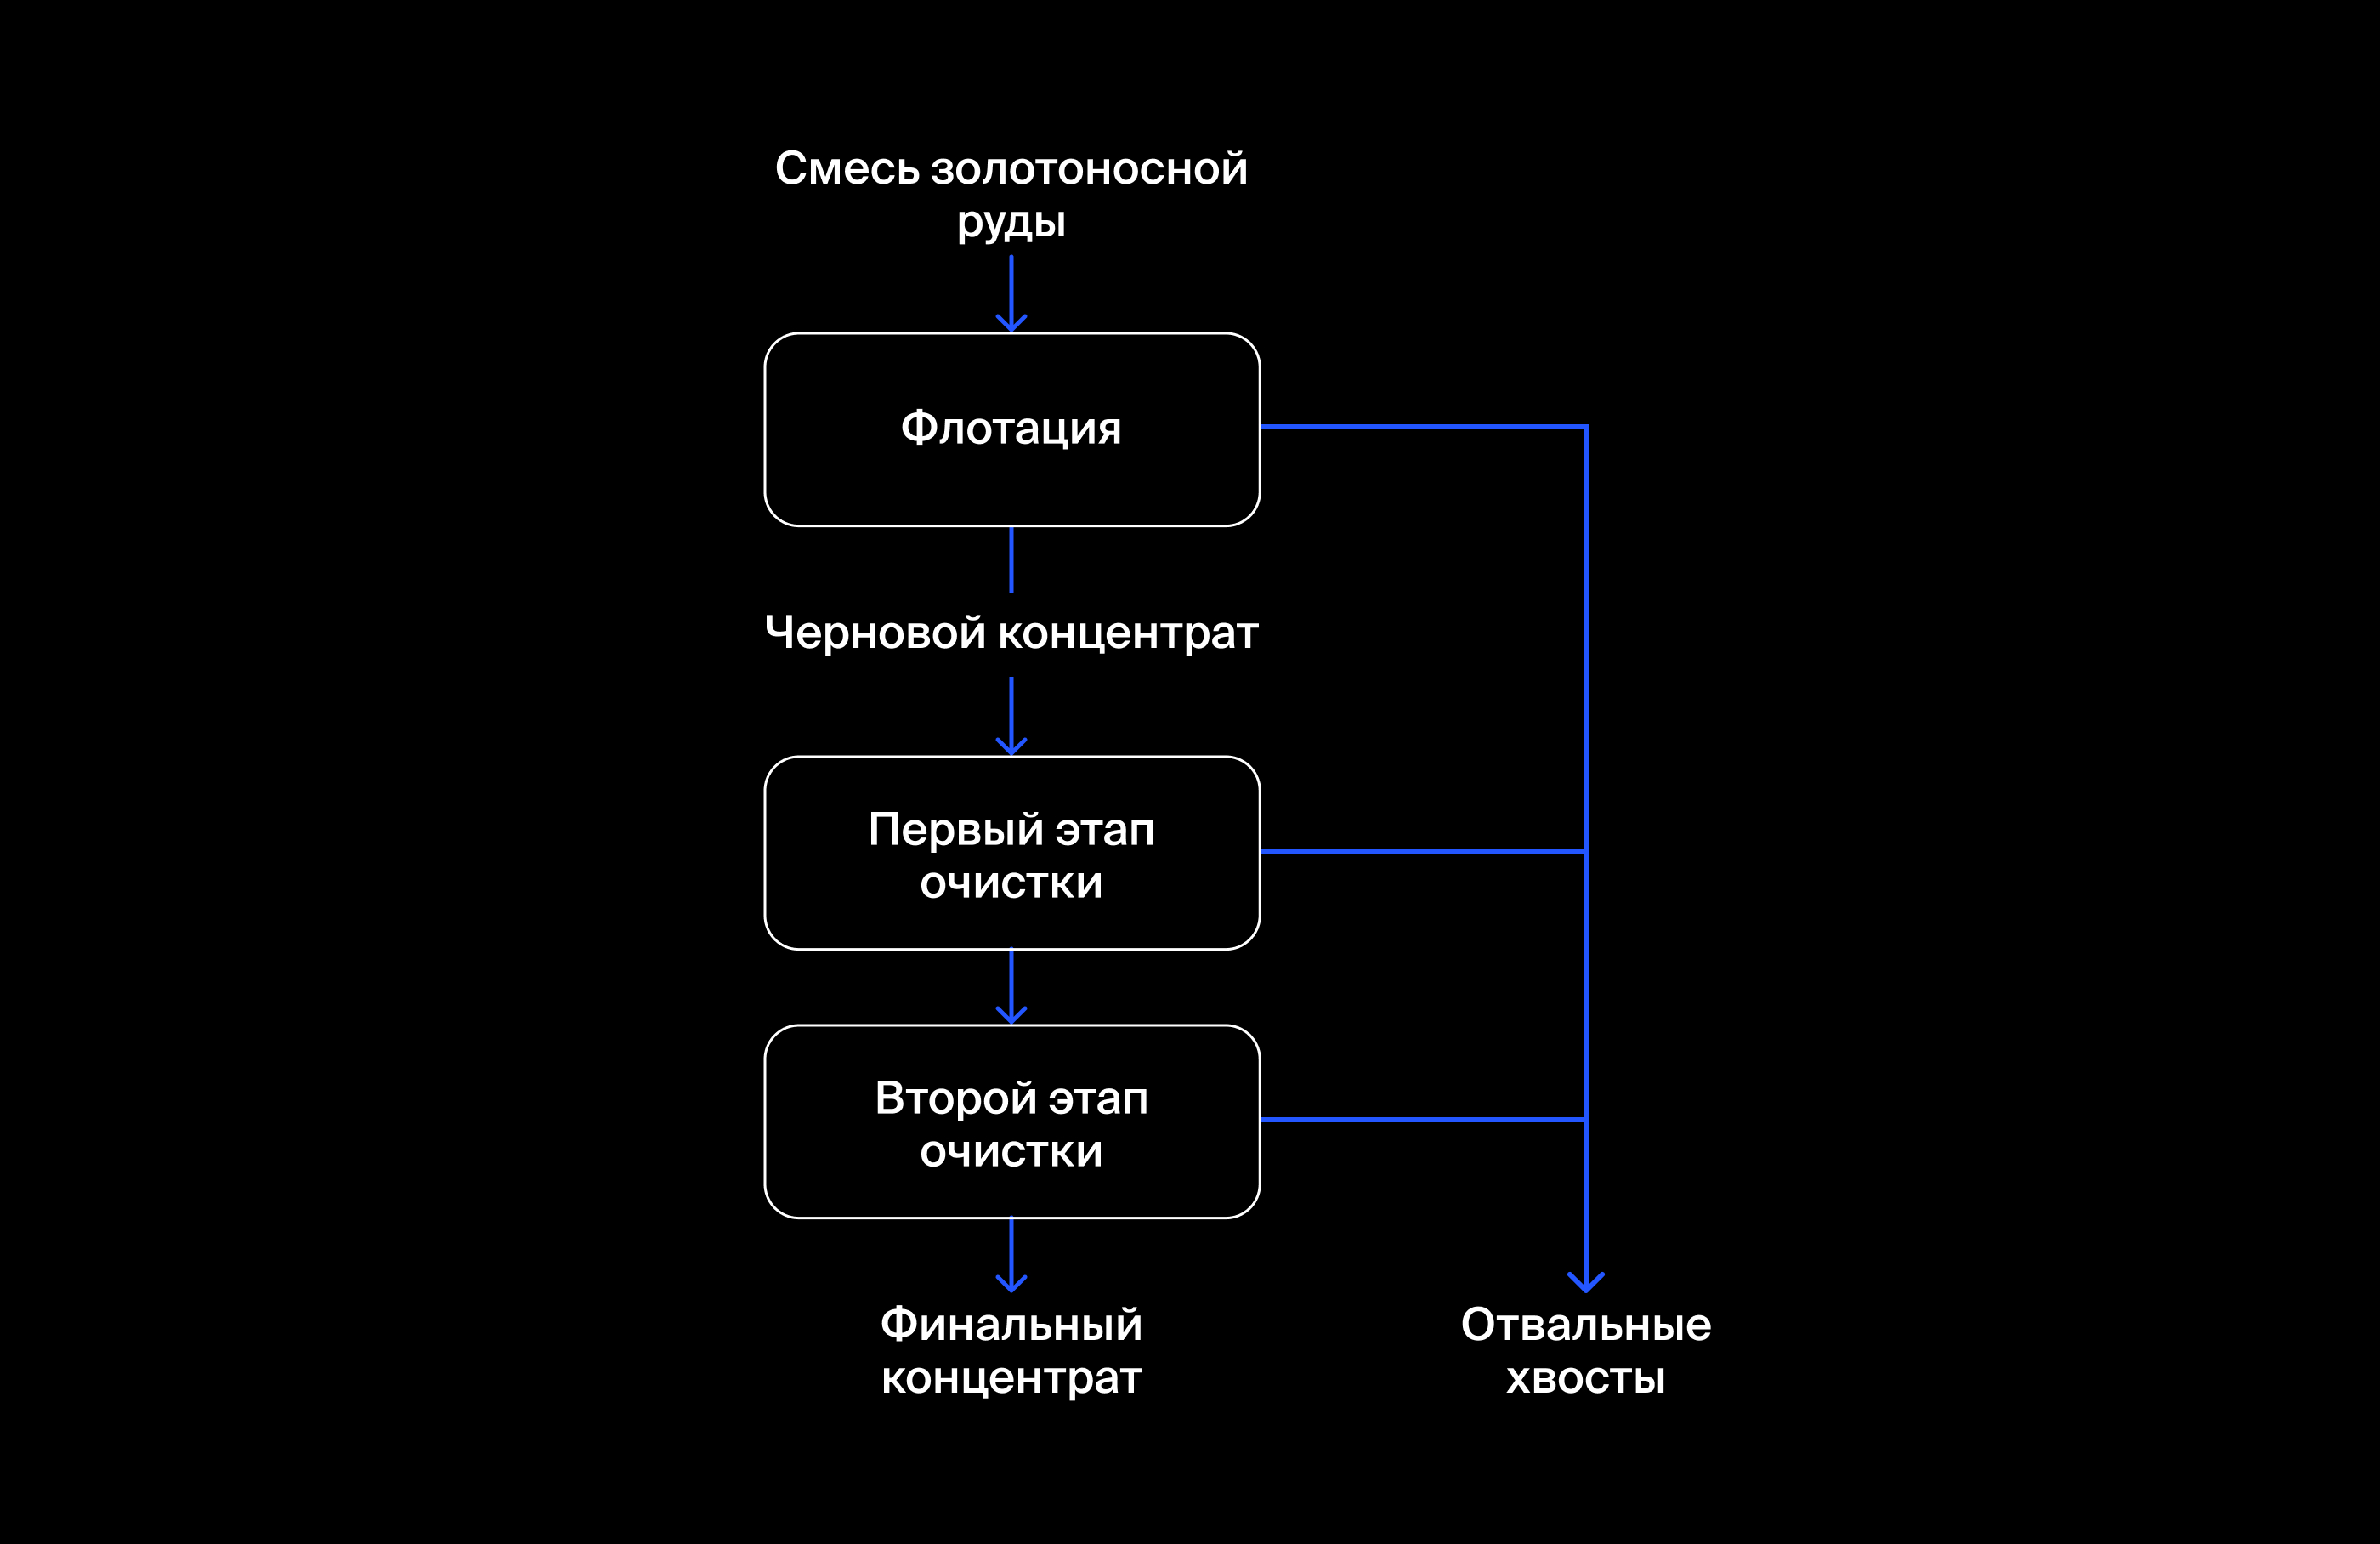

Опишем каждую стадию:

**1. Флотация**

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.

На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

**2. Очистка**

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

## Расчёт эффективности
Вам нужно смоделировать процесс восстановления золота из золотосодержащей руды.

Эффективность обогащения рассчитывается по формуле
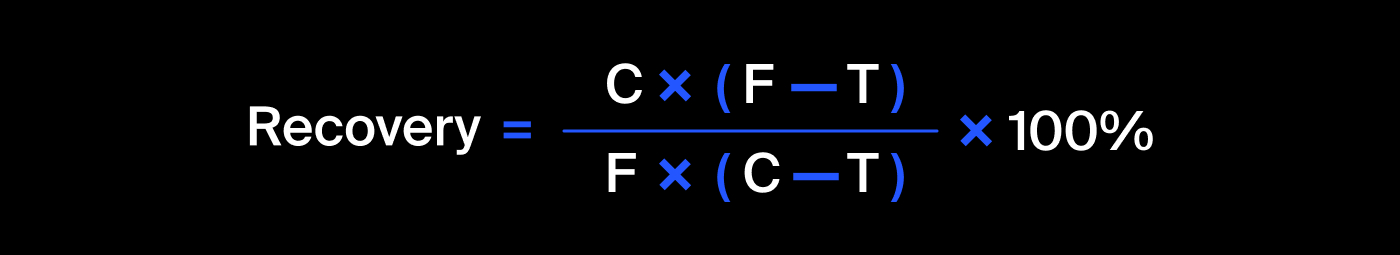

где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

**Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.**

## Метрика качества
Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.

Метрика sMAPE вычисляется так:
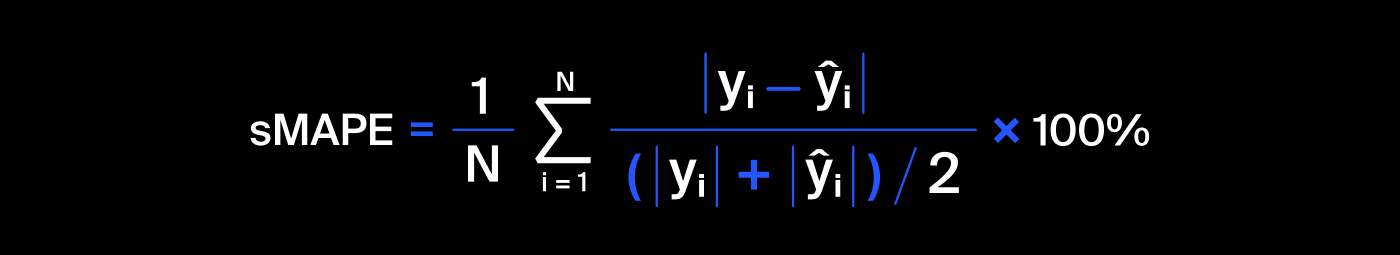

Обозначения:
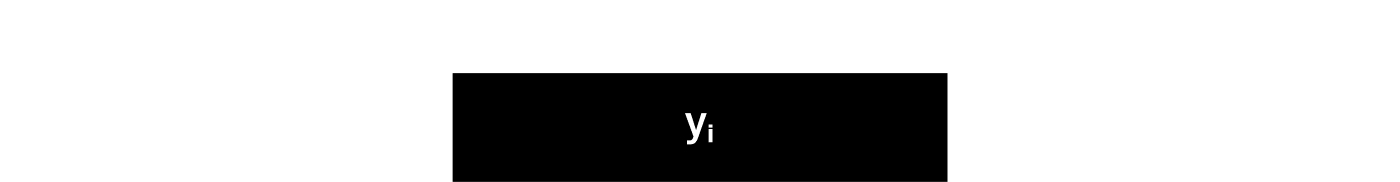
* Значение **целевого признака** для объекта с порядковым номером i в выборке, на которой измеряется качество.
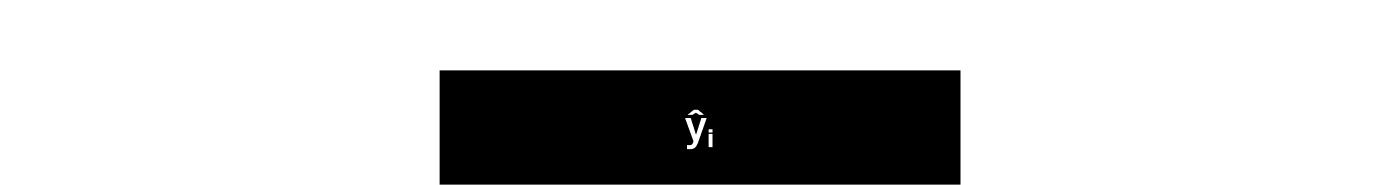
* Значение **предсказания** для объекта с порядковым номером i, например, в тестовой выборке.
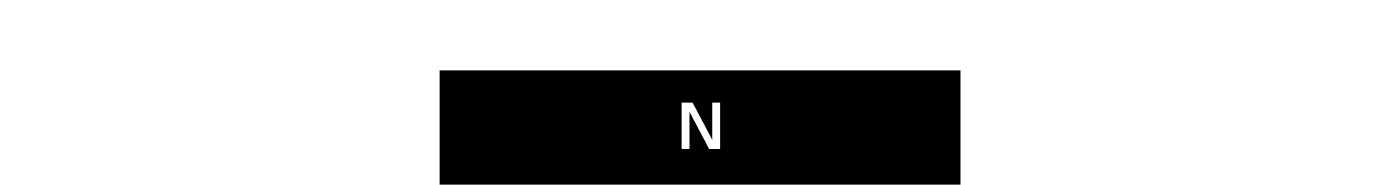
* Количество объектов в выборке.

**Нужно спрогнозировать сразу две величины**:
* эффективность обогащения чернового концентрата rougher.output.recovery;
* эффективность обогащения финального концентрата final.output.recovery.

Итоговая метрика складывается из двух величин:
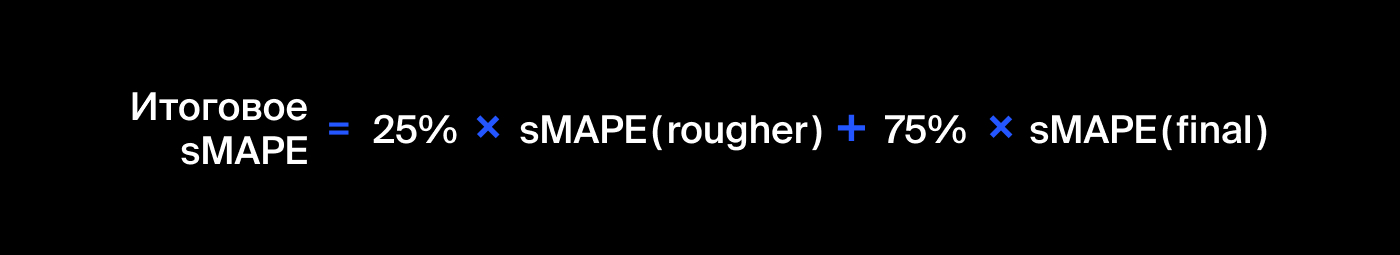

## Описание проекта
Данные находятся в трёх файлах:
* `gold_recovery_train_new.csv` — обучающая выборка;
* `gold_recovery_test_new.csv` — тестовая выборка;
* `gold_recovery_full_new.csv` — исходные данные.

Данные индексируются датой и временем получения информации (признак `date`). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

## Описание данных
### Технологический процесс
* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
* Xanthate **— ксантогенат (промотер, или активатор флотации);
* Sulphate — сульфат (на данном производстве сульфид натрия);
* Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота

### Параметры этапов
* air amount — объём воздуха
* fluid levels — уровень жидкости
* feed size — размер гранул сырья
* feed rate — скорость подачи

## Наименование признаков
Наименование признаков должно быть такое:
`[этап].[тип_параметра].[название_параметра]`

Пример: `rougher.input.feed_ag`

Возможные значения для блока `[этап]`:
* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

Возможные значения для блока `[тип_параметра]`:
* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

## План проекта
**1. Подготовка данных**
* Откройте файлы и изучите их.
* Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака `rougher.output.recovery`. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.
* Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
* Проведите предобработку данных.

**2. Анализ данных**
* Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
* Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
* Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

**3. Построенеие модели**
* Напишите функцию для вычисления итоговой sMAPE.
* Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы

## Как будут проверять проект?
* Насколько хорошо вы готовите и анализируете данные?
* Какие модели строите?
* Как проверяете их качество?
* Все ли шаги по инструкции выполняете?
* Следите за структурой проекта и поясняете выполненные шаги?
* Какие выводы делаете?
* Поддерживаете аккуратность кода и не дублируете его?

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное содержание, описание проекта и данных. Молодец!

## 1. Подготовка данных
### 1.1. Откройте файлы и изучите их.

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

try:
    train = pd.read_csv('gold_recovery_train_new.csv')
    test = pd.read_csv('gold_recovery_test_new.csv')
    full = pd.read_csv('gold_recovery_full_new.csv')
except:
    train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Если хочешь сделать ещё лучше, соблюдай стандарт PEP-8, раздели на группы и в каждой группе отсортируй импорты в алфовитном порядке.
Ссылка для ознакомления: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html 
    
Молодец, что не забываешь использовать конструкцию try... except...

In [2]:
data = [train, test, full]

for i in data:
    display(i.head())
    print('************************************************')

for i in data:
    display(i.describe())
    print('************************************************')

for i in data:
    i.info()        
    print('************************************************')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


************************************************


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


************************************************


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


************************************************


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


************************************************


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


************************************************


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol      

Предварительно заметим, что данные тестового датасета отличаются от двух остальных по количеству признаков (53 против 87). Это объясняется условием задачи: **Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.**

Отдельно следует отметить колонки `date`, которые имеют тип данных object. При этом помним, что по уловию задачи **Данные индексируются датой и временем получения информации (признак `date`). Соседние по времени параметры часто похожи.**

Также отметим, что в данных имеют пропуски, то есть требуется провести правильную предобработку данных для получения адекватных результатов анализа и моделей.

### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака `rougher.output.recovery`. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

Напомним, эффективность обогащения рассчитывается по формуле
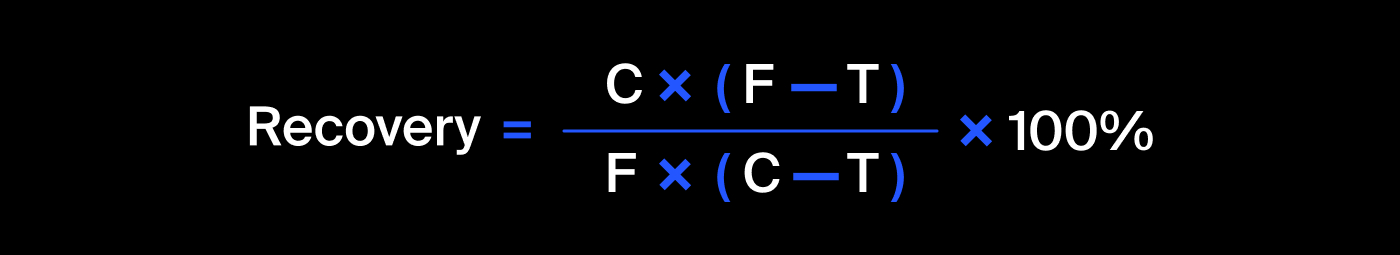

где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

In [3]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

recovery_check = (C*(F-T))/(F*(C-T))*100
print('MAE м/у расчётными и данными значениями эффектвиности:', mean_absolute_error(train['rougher.output.recovery'], recovery_check))

MAE м/у расчётными и данными значениями эффектвиности: 9.73512347450521e-15


Значение MAE получилось очень маленьким, что свидетельствует о том, что различия минимальны. Следовательно, делаем вывод, что эффективность обогащения рассчитана правильно

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Твое расссчитанное значение `MAE` верно. Рекомендую тебе расчёт эффективности вынести в отдельную функцию.

### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
По условию в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. При этом также в тестовом наборе нет целевых признаков. Проверим две выборки

Применим метод `difference()`, который возвращает количество столбцов train, которых нет в test 


In [4]:
train_not_test = list(train.columns.difference(test.columns))

print(len(train_not_test))
train_not_test

34


['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В test отсутствуют 34 признака. 
* **30** из них с типом параметра `output`, они являются целевыми признаками, что есть причина тому, почему этих признаков нет в тестовой выборке
* Остальные **4** с типом параметра `calculation`, данные признаки замеряются (рассчитываются) значительно позже, что также объясняет то, что их нет в тестовой выборке. **Значит данные признаки должны быть исключены во `features` перед обучением моделей**

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Все верно, в тестовой выборке недоступны некоторые расчетные (calculation) и выходные (output) характеристики процесса, ведь их невозможно получить либо измерить во время выполнения технологического процесса.

### 1.4. Проведите предобработку данных.
**Поработаем с пропусками в данных;** 
* Пропусков в интересующих нас **целевых признаках** `('rougher.output.recovery','final.output.recovery')` **нет**. Иначе следовало бы их удалить, поскольку, заполнив их предполагаемыми значениями (медиана, предыдущее значение), мы можем получить некорректные результаты. 
* В прочих признаках пропуски можно заполнить предыдущим значением, поскольку, по условию задачи **Соседние по времени параметры часто похожи**. В этом поможет метод `ffill()`

In [5]:
for i in data:
    i.ffill(inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Верно!👍:\
</b> Верное решение по обработке пропусков, в признаках их не много. Все наблюдения представляют собой последовательные измерения, заполнить пропуски можно методами `pandas`: `ffill`/ `bfill`/ `interpolate` , это вполне уместно.\
Хочу посоветовать тебе статью, которая рассматривает разные способы обработки пропусков, выделяет их плюсы и минусы, думаю, тебе может быть интересно: https://loginom.ru/blog/missing  

In [6]:
# проверим, заполнились ли пропуски
for i in data:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


Пропуски заполнены теперь можно **подготовить данные к обучению, удалив ненужные признаки с типами параметров `output` и `calculaton`**. ОДНАКО стоит перед этим провести анализ данных.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
    
Данные подготовили, приступаем к анализу)
    
Для интереса, оставляю тебе ссылку, по флотации руды: https://www.youtube.com/watch?v=qYuGEjR8ZKw&t=13s


## 2. Анализ данных 

### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [7]:
print('Концентрация элементов до флотации: Au = {:.2f}, Ag = {:.2f}, Pb = {:.2f}'.format(train['rougher.input.feed_au'].median(), train['rougher.input.feed_ag'].median(), train['rougher.input.feed_pb'].median()))

print('Концентрация элементов после флотации: Au = {:.2f}, Ag = {:.2f}, Pb = {:.2f}'.format(train['rougher.output.concentrate_au'].median(), train['rougher.output.concentrate_ag'].median(), train['rougher.output.concentrate_pb'].median()))

print('Концентрация элементов после первого этапа очистки: Au = {:.2f}, Ag = {:.2f}, Pb = {:.2f}'.format(train['primary_cleaner.output.concentrate_au'].median(), train['primary_cleaner.output.concentrate_ag'].median(), train['primary_cleaner.output.concentrate_pb'].median()))

print('Концентрация элементов после второго этапа очистки: Au = {:.2f}, Ag = {:.2f}, Pb = {:.2f}'.format(train['final.output.concentrate_au'].median(), train['final.output.concentrate_ag'].median(), train['final.output.concentrate_pb'].median()))


Концентрация элементов до флотации: Au = 7.65, Ag = 8.16, Pb = 3.41
Концентрация элементов после флотации: Au = 19.95, Ag = 11.75, Pb = 7.76
Концентрация элементов после первого этапа очистки: Au = 33.23, Ag = 8.23, Pb = 9.92
Концентрация элементов после второго этапа очистки: Au = 44.87, Ag = 4.99, Pb = 10.30


Text(0.5, 1.0, 'Final concentrations')

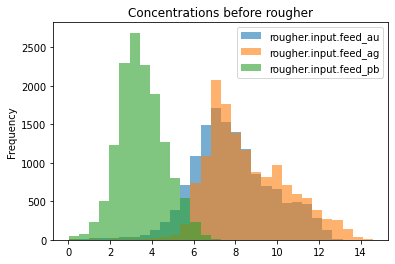

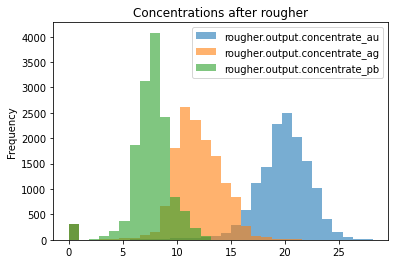

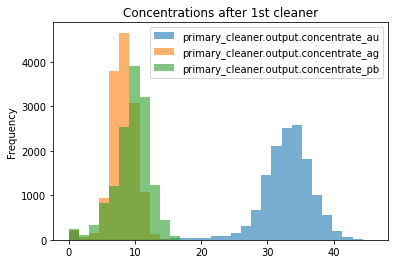

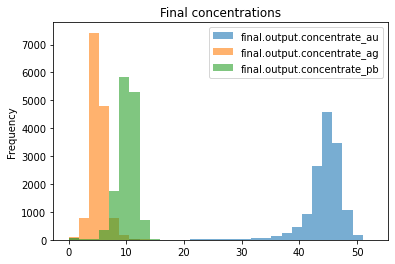

In [8]:
train.plot(y = ['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb'],kind='hist', alpha=0.6, bins=30).set_title('Concentrations before rougher')
train.plot(y = ['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb'],kind='hist', alpha=0.6, bins=30).set_title('Concentrations after rougher')
train.plot(y = ['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb'],kind='hist', alpha=0.6, bins=30).set_title('Concentrations after 1st cleaner')
train.plot(y = ['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb'],kind='hist', alpha=0.6, bins=30).set_title('Final concentrations')

На графиках каждого этапа мы видим, что концентрация золота планомерно увеличвается после очередного этапа очистки.

Выводы по медианным значениям:
* Au: концентрация увеличилась с 7.65 до 44.87 (с каждым этапом очистки концентрация увеличивалась примерно в 2 раза). 
* Ag: концентрация снизилась с 8.16 до 4.99
* Pb: концентрация увеличилась с 3.41 до 10.30 (однако за все этапы очистки концентрация увеличилась не намного, относительно показателей золота)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Верно!👍:\
</b> Интересно было изучить твои графики, удобный и красивый графический анализ. Видно, что золото растёт - и это хорошо) Серебро падает - это логично, мы же производим золото)
А свинец - побочный элемент химических реакций, поэтому не много увеличивается его содержание)

### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

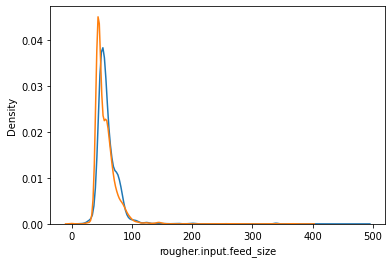

In [9]:
sns.kdeplot(data=train['rougher.input.feed_size'], label='train')
sns.kdeplot(data=test['rougher.input.feed_size'], label='test')
plt.show()

Распределения визуально очень похожи => препятствий для получения правильной оценки модели нет 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Правильно, распределения примерно одинаковы. Можно было тут еще добавить пару слов, на что похожи распределения, смещены ли...

### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [10]:
# Суммарные концентрации на всех этапах train:
rougher_input = train['rougher.input.feed_au']+ train['rougher.input.feed_ag'] + train['rougher.input.feed_pb'] + train['rougher.input.feed_sol']
rougher_output = train['rougher.output.concentrate_au']+ train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_sol']
primary_cleaner_output = train['primary_cleaner.output.concentrate_au']+ train['primary_cleaner.output.concentrate_ag'] + train['primary_cleaner.output.concentrate_pb'] + train['primary_cleaner.output.concentrate_sol']
final_output = train['final.output.concentrate_au'] + train['final.output.concentrate_ag'] + train['final.output.concentrate_pb'] + train['final.output.concentrate_sol']

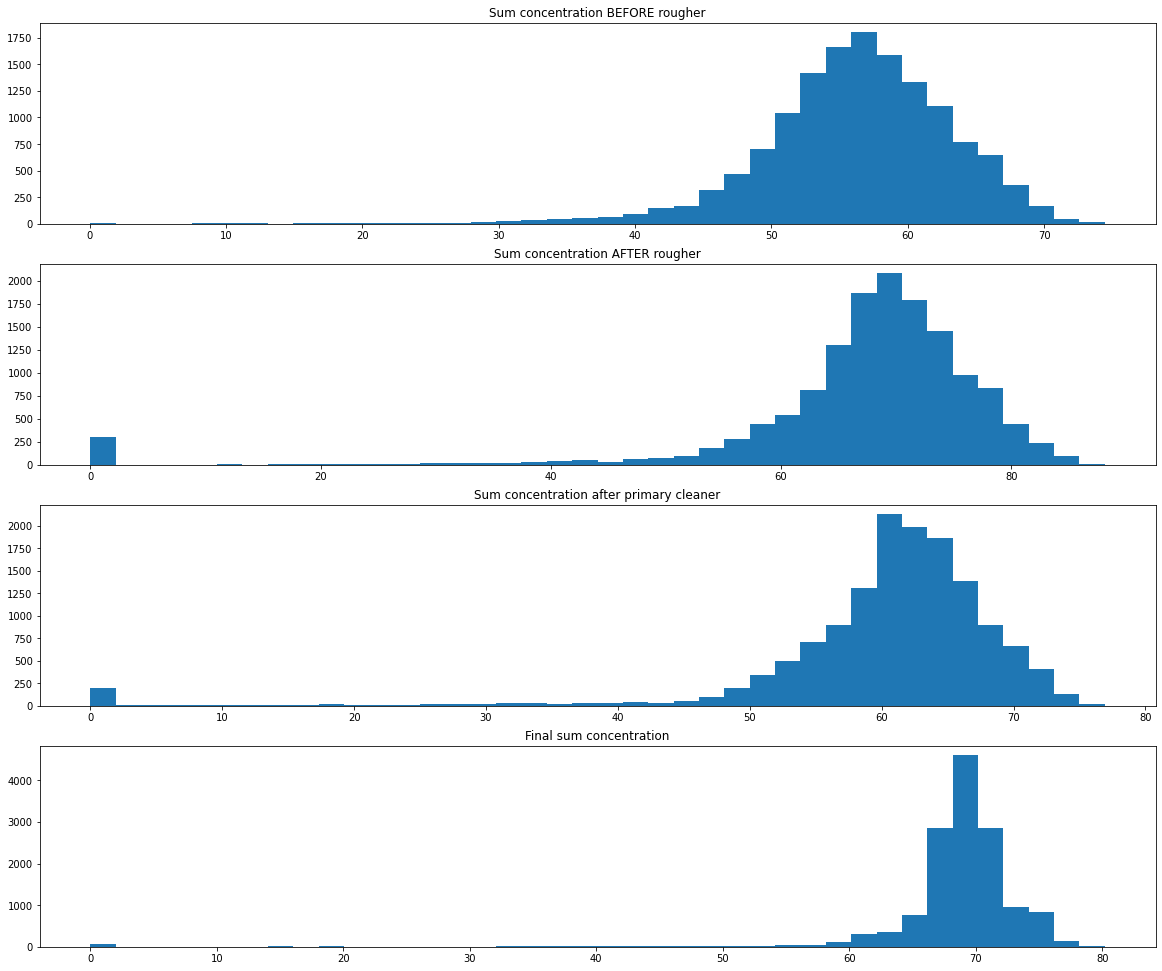

In [11]:
# Исследуем суммарные концентрации по графикам
fig,ax = plt.subplots(4,1,figsize = (20,17))
ax[0].hist(rougher_input, bins=40)
ax[0].set_title('Sum concentration BEFORE rougher')
ax[1].hist(rougher_output, bins=40)
ax[1].set_title('Sum concentration AFTER rougher')
ax[2].hist(primary_cleaner_output, bins=40)
ax[2].set_title('Sum concentration after primary cleaner')
ax[3].hist(final_output, bins=40)
ax[3].set_title('Final sum concentration')
plt.show()

Видим много около нулевых значений - **аномалии**, которые получились, скорее всего, из-за ошибки при измерении - следует их удалить. Соответственно, из test также удалим нулевые значения

Также проверим наличие выбросов с помощью boxplot

Обрубать по максимуму не будем, но можно отсечь часть в каждой стадии. Пусть это будет значение примерно равное 20, то есть с каждого элемента уберем значения концентрации меньше 5 

In [12]:
#до флотации train
train = train.drop(index = train[train['rougher.input.feed_au'] < 1].index, axis = 0)
train = train.drop(index = train[train['rougher.input.feed_ag'] < 1].index, axis = 0)
train = train.drop(index = train[train['rougher.input.feed_pb'] < 1].index, axis = 0)
train = train.drop(index = train[train['rougher.input.feed_sol'] < 1].index, axis = 0)
#до флотации test
test = test.drop(index = test[test['rougher.input.feed_au'] < 1].index, axis = 0)
test = test.drop(index = test[test['rougher.input.feed_ag'] < 1].index, axis = 0)
test = test.drop(index = test[test['rougher.input.feed_pb'] < 1].index, axis = 0)
test = test.drop(index = test[test['rougher.input.feed_sol'] < 1].index, axis = 0) 

#после флотации
train = train.drop(index = train[train['rougher.output.concentrate_au'] < 1].index, axis = 0)
train = train.drop(index = train[train['rougher.output.concentrate_ag'] < 1].index, axis = 0)
train = train.drop(index = train[train['rougher.output.concentrate_pb'] < 1].index, axis = 0)
train = train.drop(index = train[train['rougher.output.concentrate_sol'] < 1].index, axis = 0)

#после первой очистки
train = train.drop(index = train[train['primary_cleaner.output.concentrate_au'] < 1].index, axis = 0)
train = train.drop(index = train[train['primary_cleaner.output.concentrate_ag'] < 1].index, axis = 0)
train = train.drop(index = train[train['primary_cleaner.output.concentrate_pb'] < 1].index, axis = 0)
train = train.drop(index = train[train['primary_cleaner.output.concentrate_sol'] < 1].index, axis = 0)

#финальный концентрат
train = train.drop(index = train[train['final.output.concentrate_au'] < 1].index, axis = 0)
train = train.drop(index = train[train['final.output.concentrate_ag'] < 1].index, axis = 0)
train = train.drop(index = train[train['final.output.concentrate_pb'] < 1].index, axis = 0)
train = train.drop(index = train[train['final.output.concentrate_sol'] < 1].index, axis = 0)

Проверим графики после удаления аномалий

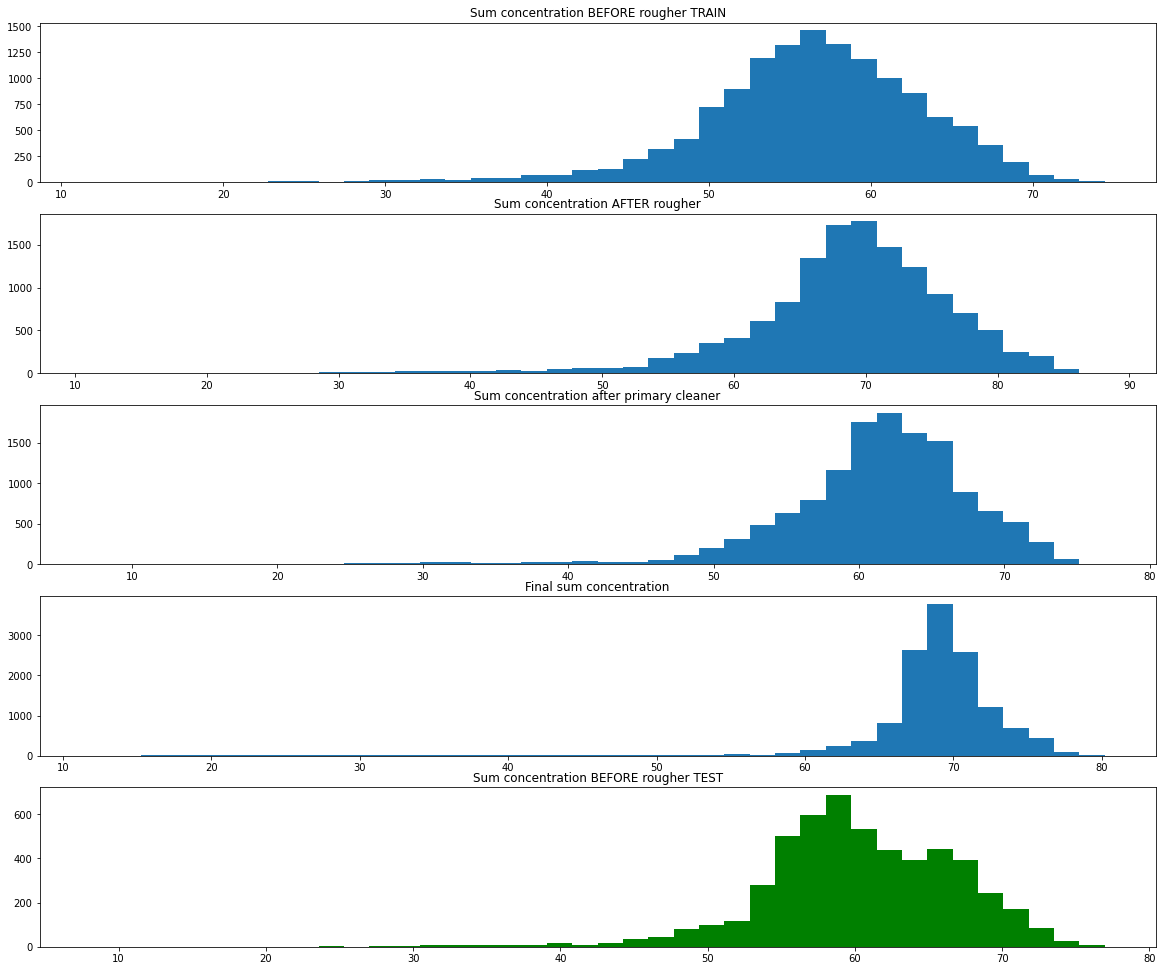

In [13]:
# Суммарные концентрации на все этапах train:
rougher_input = train['rougher.input.feed_au']+ train['rougher.input.feed_ag'] + train['rougher.input.feed_pb'] + train['rougher.input.feed_sol']
rougher_output = train['rougher.output.concentrate_au']+ train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_sol']
primary_cleaner_output = train['primary_cleaner.output.concentrate_au']+ train['primary_cleaner.output.concentrate_ag'] + train['primary_cleaner.output.concentrate_pb'] + train['primary_cleaner.output.concentrate_sol']
final_output = train['final.output.concentrate_au'] + train['final.output.concentrate_ag'] + train['final.output.concentrate_pb'] + train['final.output.concentrate_sol']
# Суммарные концентрации на все этапах test:
rougher_input_test = test['rougher.input.feed_au']+ test['rougher.input.feed_ag'] + test['rougher.input.feed_pb'] + test['rougher.input.feed_sol']

# Исследуем суммарные концентрации по графикам
fig,ax = plt.subplots(5,1,figsize = (20,17))
ax[0].hist(rougher_input, bins=40)
ax[0].set_title('Sum concentration BEFORE rougher TRAIN')
ax[1].hist(rougher_output, bins=40)
ax[1].set_title('Sum concentration AFTER rougher')
ax[2].hist(primary_cleaner_output, bins=40)
ax[2].set_title('Sum concentration after primary cleaner')
ax[3].hist(final_output, bins=40)
ax[3].set_title('Final sum concentration')
ax[4].hist(rougher_input_test, bins=40, color='green')
ax[4].set_title('Sum concentration BEFORE rougher TEST')
plt.show()

Выборки очищены от аномальных выбросов

<div class="alert alert-info"> 
ВОПРОС: Стоило ли удалять также редкие значения (на графиках до отметки около 30)? Если да, то как это лучше реализовать? Заранее спасибо большое!
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Замечательно, суммарную концентрацию всех веществ на разных стадиях исследовали и нашли аномалии.
 
В целом отдельно по каждому веществу ноль может быть (не всегда же есть крупинки золота в руде), а ноль суммарно - вряд ли (в руде хоть что-то но будет) А если мы имеем ноль, значит большая вероятность неточности в измерениях.
    
Правильный вывод, обучающую выборку нужно очистить от таких аномалий.
    
Ответ: стоит проверить это, рекомендую тут построить ящики с усами по суммарным концентрациям для корректного отсечения аномалий суммарных концентраций.

# 3. Построенеие модели

### 3.1. Напишите функцию для вычисления итоговой sMAPE.

Напомним:
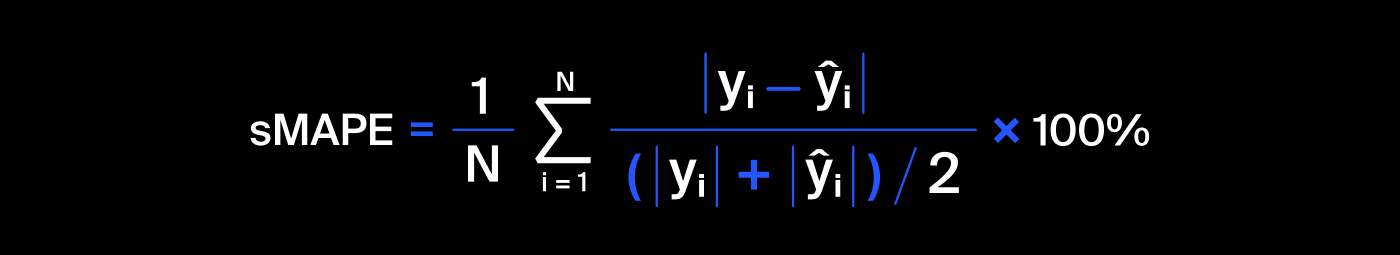

**Нужно спрогнозировать сразу две величины**:
* эффективность обогащения чернового концентрата rougher.output.recovery;
* эффективность обогащения финального концентрата final.output.recovery.

Итоговая метрика складывается из двух величин:
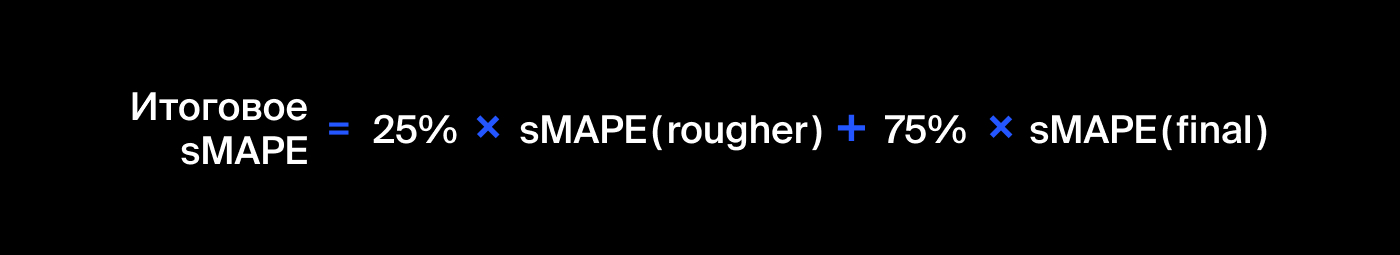

In [14]:
#напишем функции вычисления sMAPE и итоговое sMAPE

def smape(target, prediction):
    numerator = abs(target-prediction)
    denominator = (abs(target)+abs(prediction))/2
    value = (numerator/denominator).mean()*100
    return value

def weighted_smape(smape0, smape1):
    weighted_value = 0.25*smape0+0.75*smape1
    return weighted_value

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Функция правильная) Молодец, что для избежания дублирования кода вначале используешь функцию для невзвешенной sMAPE.

### 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы

Для начала выделим target и features:

По **train**: 
* target: выделим target_rougher и target_final для прогноза эффективностей обогащения чернового и финального концентратов, соответственно;
* features: удалим ненужные признаки, включая два целевых признака. При этом для rougher выделим признаки только касающиеся данного этапа. Для final надо будет лишь убрать rougher.output.recovery и final.output.recovery

In [15]:
# выделим target для rougher
target_train_rougher = train['rougher.output.recovery']
# выделим target для final
target_train_final = train['final.output.recovery']

In [16]:
# выделим features для final
features_train_final = train.drop(columns = train_not_test)
features_train_final = features_train_final.drop(columns='date')
# выделим features для rougher 
train_cols = pd.Series(train.columns)
features_train_rougher_col = list(train_cols[train_cols.str.contains('rougher.input|rougher.state')])
features_train_rougher = train[features_train_rougher_col]

features_train_rougher.head() 

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
0,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,...,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636
1,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,...,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001
2,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,...,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147
3,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,...,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835
4,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,6.194897,...,1600.208824,-449.599614,1600.357732,-450.034364,1599.759049,-449.909799,1401.560902,-448.877187,1401.160227,-450.407128


По **test**:

Сначала нужно добавить недостающие признаки в test, поскольку изначально в данном датасете их нет...возьмем все нужные признаки из full по совпадению по колнке date;

In [17]:
test = full[full['date'].isin(test['date'])]

# выделим target для rougher
target_test_rougher = test['rougher.output.recovery']
# выделим target для final
target_test_final = test['final.output.recovery']

# выделим features для final
features_test_final = test.drop(columns = train_not_test)
features_test_final = features_test_final.drop(columns='date')
# выделим features для rougher 
test_cols = pd.Series(test.columns)
features_test_rougher_col = list(test_cols[test_cols.str.contains('rougher.input|rougher.state')])
features_test_rougher = test[features_test_rougher_col]

features_test_rougher.head() 

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
4682,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,...,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807
4683,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,...,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514
4684,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,...,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340
4685,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,...,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.503052,1001.930679,-400.437573,950.735324,-399.802986
4686,11.327427,4.767383,488.248117,63.315324,41.269161,11.290425,13.607257,5.738081,13.650053,5.739634,...,1304.658848,-399.511519,1306.455515,-399.050685,1248.699349,-400.876894,1058.839106,-398.988239,949.645313,-399.277632


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вытягивание целевых признаков в тестовую выборку правильное)

Заметим также, что у признаков разный **масштаб** - приведем их к одному масштабу

In [18]:
# По train
# приводим к одному масштабу для rougher
scaler_rougher = StandardScaler()
features_train_rougher = scaler_rougher.fit_transform(features_train_rougher)
# приводим к одному масштабу для final
scaler_final = StandardScaler()
features_train_final = scaler_final.fit_transform(features_train_final)

# По test, здесь был использован метод `transform`, вместо `fit_transform`
# приводим к одному масштабу для rougher
features_test_rougher = scaler_rougher.transform(features_test_rougher)
# приводим к одному масштабу для final
features_test_final = scaler_final.transform(features_test_final)

Напишем функцию оценки качества моделей **кросс-валидацией**

In [19]:
# напишем функцию кросс-валидации, задав использование ранее созданной функции smape
from sklearn.metrics import make_scorer

def get_cross_val_score(model, target, features):
    scorer = make_scorer(smape, greater_is_better=False)
    scores = cross_val_score(model,
                             features,
                             target,
                             cv=5,
                             scoring=scorer)
    return -scores.mean()

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Тут ошибка: сейчас параметр `greater_is_better` в `make_scorer()` выбран по-умолчанию. Но в нашей задаче, чем ниже sMAPE, тем лучше. Исправь, пожалуйста.
    <div class="alert alert-warning">
    <h2> Комментарий студента <a class="tocSkip"> </h2>
    
<b>Не понял, как работает `greater_is_better`. Он будто просто переворачивает знак на отрицательный.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Этот параметр в случае значения False задает правило: чем меньше метрика, тем лучше. При True - наоборот. Мы же хотим уменьшить sMAPE, верно? На знак минус можно не обращать внимание. Чтобы избавиться от знака минус у метрики, можно в функцию `print` добавить знак `-`.
    
Исправь, пожалуйста.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Вижу, хорошо.

Переходим к **обучению моделей и оценим их качество кросс-валидацией**

**DecisionTreeRegressor**

In [20]:
# #используем defaultdict для дальнейшего отображения датафрейма
# table = defaultdict(list)

# #В ходе цикла запишем лучшие модели rougher и final в слдеующие переменные:
# dt_best_model_rougher = None
# dt_best_model_final = None

# #В ходе цикла запишем лучшие итоговый sMAPE и глубину дерева модели в следующие переменные:
# dt_best_weighted_smape = 20
# dt_best_max_depth = 0

# for depth in range(2, 8):
#     dt_model_rougher = DecisionTreeRegressor(max_depth=depth, random_state=12345)
#     dt_model_final = DecisionTreeRegressor(max_depth=depth, random_state=12345)
#     dt_rougher_smape = get_cross_val_score(dt_model_rougher, target_train_rougher, features_train_rougher)
#     dt_final_smape = get_cross_val_score(dt_model_final, target_train_final, features_train_final)
#     dt_weighted_smape = weighted_smape(dt_rougher_smape, dt_final_smape)
#     if dt_weighted_smape < dt_best_weighted_smape:
#         dt_best_model_rougher = dt_model_rougher
#         dt_best_model_final = dt_model_final
#         dt_best_weighted_smape = dt_weighted_smape
#         dt_best_max_depth = depth
#     #формируем таблицу для визуала
#     table['smape_rougher'].append(dt_rougher_smape)
#     table['smape_final'].append(dt_final_smape)
#     table['weighted_smape'].append(weighted_smape(dt_rougher_smape, dt_final_smape))
#     table['depth'].append(depth)

# print('-------------------------------------------------')
# print("Итоговый sMAPE наилучшей модели на валидационной выборке:", dt_best_weighted_smape)
# print('Max_depth: ', dt_best_max_depth)
# #Отобразим датафрейм
# pd.DataFrame(table).sort_values(by='weighted_smape')

**Попробуем найти лучшие гиперпараметры через `GridSearchCV`**

In [21]:
%%time

smape_scorer = make_scorer(smape, greater_is_better=False)

# rougher:
# Зададим перебираемые гиперпараметры
parametrs = {'max_depth': range (2,8),'min_samples_split': range (2,10,2)}

# Запускаем обучение:
grid = GridSearchCV(DecisionTreeRegressor(random_state=12345), parametrs, scoring=smape_scorer, cv=5)
grid.fit(features_train_rougher, target_train_rougher)

#Выводим результаты:
dtr_best_params_rougher = grid.best_params_
dtr_best_params_rougher

CPU times: user 15.9 s, sys: 0 ns, total: 15.9 s
Wall time: 29.2 s


{'max_depth': 4, 'min_samples_split': 4}

In [22]:
%%time

# ищем smape DecisionTreeRegressor rougher
dtr_smape_rougher = get_cross_val_score(grid, target_train_rougher, features_train_rougher)
dtr_smape_rougher

CPU times: user 1min, sys: 146 ms, total: 1min
Wall time: 2min 4s


7.111023982318052

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
     
Чтобы не обучать модель заново в `get_cross_val_score` и считать метрику, можно воспользоваться методом `GridSearchCV`: `.best_score_` (в GridSearchCV уже встроена кросс-валидация). Лучшую модель можно вызвать с `.best_estimator_`

In [23]:
# final:

# Запускаем обучение:
grid.fit(features_train_final, target_train_final)

#Выводим результаты:
dtr_best_params_final = grid.best_params_
dtr_best_params_final

{'max_depth': 2, 'min_samples_split': 2}

In [24]:
# ищем smape DecisionTreeRegressor final
dtr_smape_final = get_cross_val_score(grid, target_train_final, features_train_final)
dtr_smape_final

9.399625341974097

In [25]:
# ищем итоговый sMAPE
dtr_weighted_smape = weighted_smape(dtr_smape_rougher, dtr_smape_final)
dtr_weighted_smape

8.827475002060087

In [26]:
# # проверим на тестовой выборке
# #rougher
# rfr_best_model_rougher = RandomForestRegressor(max_depth = 4, min_samples_split = 4, random_state = 12345)
# rfr_best_model_rougher.fit(features_train_rougher, target_train_rougher)
# rfr_test_predictions_rougher = rfr_best_model_rougher.predict(features_test_rougher)
# rfr_smape_rougher_test = smape(target_test_rougher, rfr_test_predictions_rougher)

# #final
# rfr_best_model_final = RandomForestRegressor(max_depth = 2, min_samples_split = 2, random_state = 12345)
# rfr_best_model_final.fit(features_train_final, target_train_final)
# rfr_test_predictions_final = rfr_best_model_final.predict(features_test_final)
# rfr_smape_final_test = smape(target_test_final, rfr_test_predictions_final)

# #итоговый sMAPE
# rfr_weighted_smape_test = weighted_smape(rfr_smape_rougher_test, rfr_smape_final_test)
# rfr_weighted_smape_test

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
     
Рекомендую использовать `GridSearchCV` для подбора гиперпараметров, вместо циклов.

<div class="alert alert-info" role="alert">
     <h2> Комментарий студента <a class="tocSkip"> </h2>
    
<b>Хотел бы на досуге в ближайшие дни попробовать `GridSearchCV`, могу ли я тебе как-нибудь скинуть, если что, чтоб оценить, правильно ли все сделал? :)</b> 
     

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Да можешь скинуть в следующей итерации проекта, но это не обязательно. 

**RandomForestRegressor**

In [27]:
table1 = defaultdict(list)

rf_best_model_rougher = None
rf_best_model_final = None

rf_best_weighted_smape = 20
rf_max_depth = 0

for depth in range(2,8):
    rf_model_rougher = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=depth)
    rf_model_final = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=depth)
    rf_rougher_smape = get_cross_val_score(rf_model_rougher, target_train_rougher, features_train_rougher)
    rf_final_smape = get_cross_val_score(rf_model_final, target_train_final, features_train_final)
    rf_weighted_smape = weighted_smape(rf_rougher_smape, rf_final_smape)
    if rf_weighted_smape < rf_best_weighted_smape:
        rf_best_model_rougher = rf_model_rougher
        rf_best_model_final = rf_model_final
        rf_best_weighted_smape = rf_weighted_smape
        rf_max_depth = depth
    table1['smape_rougher'].append(rf_rougher_smape)
    table1['smape_final'].append(rf_final_smape)
    table1['weighted_smape'].append(rf_weighted_smape)
    table1['depth'].append(depth)
print('-------------------------------------------------')
print("Итоговый sMAPE наилучшей модели на валидационной выборке:", rf_best_weighted_smape)
print('Глубина деревьев: ', rf_max_depth)
pd.DataFrame(table1).sort_values(by='weighted_smape')

-------------------------------------------------
Итоговый sMAPE наилучшей модели на валидационной выборке: 8.089192871641748
Глубина деревьев:  4


,smape_rougher,smape_final,weighted_smape,depth
2,6.382072,8.658233,8.089193,4
3,6.358456,8.737776,8.142946,5
4,6.410275,8.856536,8.244970,6
1,6.626135,8.795926,8.253478,3
5,6.491820,9.039653,8.402695,7
0,7.145841,8.840586,8.416900,2


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
     
Рекомендую вместо `n_estimators` перебирать более полезный гиперпараметр, а  `n_estimators` задать в константы модели со значением, например 20.
         <h2> Комментарий студента <a class="tocSkip"> </h2>
    
<b>Исправил

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Следует использовать больше одного набора гиперпараметров (и перебирать их) хотя бы для одной модели. Исправь, пожалуйста.
    <div class="alert alert-info">
             <h2> Комментарий студента <a class="tocSkip"> </h2>
    
<b>Сделал по DecisionTree (подбирал гиперпараметры `max_depth` и `min_samples_split`),так как по RandomForest долго считает + сделал DecisionTree по GridSearchCV

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Вижу, хорошо. `GridSearchCV` применен правильно.

**LinearRegression**

In [28]:
lr_model_rougher = LinearRegression()
lr_model_final = LinearRegression()

lr_rougher_smape = get_cross_val_score(lr_model_rougher, target_train_rougher, features_train_rougher)
lr_final_smape = get_cross_val_score(lr_model_final, target_train_final, features_train_final)
lr_weighted_smape = weighted_smape(lr_rougher_smape, lr_final_smape)

print('Эффективность обогащения чернового концентрата (sMAPE)',lr_rougher_smape)
print('Эффективность обогащения финального концентрата (sMAPE)',lr_final_smape)
print('Эффективность обогащения итогового концентрата (sMAPE)',lr_weighted_smape)

Эффективность обогащения чернового концентрата (sMAPE) 6.666341627271587
Эффективность обогащения финального концентрата (sMAPE) 10.676502645068036
Эффективность обогащения итогового концентрата (sMAPE) 9.673962390618923


Наилучшей моедлью оказаалсь Random Forest. Проверяем ее на **тестовой** выборке.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Вижу, что ты сразу проверяешь модели на тестовой выборке. Так не стоит делать, т.к. тестовая выборка нужна только для проверки модели-победителя с шага обучения. Исправь, пожалуйста.
 </div>
<div class="alert alert-info" role="alert">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
<b>ОК

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Хорошо.

**DecisionTreeRegressor**

In [29]:
# dt_best_model_rougher.fit(features_train_rougher, target_train_rougher)
# dt_best_model_final.fit(features_train_final, target_train_final)

# dt_test_predictions_rougher = dt_best_model_rougher.predict(features_test_rougher)
# dt_test_predictions_final = dt_best_model_final.predict(features_test_final)

# dt_rougher_smape_test = smape(target_test_rougher, dt_test_predictions_rougher)
# dt_final_smape_test = smape(target_test_final, dt_test_predictions_final)
# dt_weighted_smape_test = weighted_smape(dt_rougher_smape_test, dt_final_smape_test)

# print('Эффективность обогащения чернового концентрата (sMAPE)',dt_rougher_smape_test)
# print('Эффективность обогащения финального концентрата (sMAPE)',dt_final_smape_test)
# print('Эффективность обогащения итогового концентрата (sMAPE)',dt_weighted_smape_test)

**RandomForestRegressor**

In [30]:
rf_best_model_rougher.fit(features_train_rougher, target_train_rougher)
rf_best_model_final.fit(features_train_final, target_train_final)

rf_test_predictions_rougher = rf_best_model_rougher.predict(features_test_rougher)
rf_test_predictions_final = rf_best_model_final.predict(features_test_final)

rf_rougher_smape_test = smape(target_test_rougher, rf_test_predictions_rougher)
rf_final_smape_test = smape(target_test_final, rf_test_predictions_final)
rf_weighted_smape_test = weighted_smape(rf_rougher_smape_test, rf_final_smape_test)

print('Эффективность обогащения чернового концентрата (sMAPE)',rf_rougher_smape_test)
print('Эффективность обогащения финального концентрата (sMAPE)',rf_final_smape_test)
print('Эффективность обогащения итогового концентрата (sMAPE)',rf_weighted_smape_test)

Эффективность обогащения чернового концентрата (sMAPE) 8.552977157078715
Эффективность обогащения финального концентрата (sMAPE) 9.944630329030698
Эффективность обогащения итогового концентрата (sMAPE) 9.596717036042701


**LinearRegression**

In [31]:
# lr_model_rougher.fit(features_train_rougher, target_train_rougher)
# lr_model_final.fit(features_train_final, target_train_final)

# lr_test_predictions_rougher = lr_model_rougher.predict(features_test_rougher)
# lr_test_predictions_final = lr_model_final.predict(features_test_final)

# lr_rougher_smape_test = smape(target_test_rougher, lr_test_predictions_rougher)
# lr_final_smape_test = smape(target_test_final, lr_test_predictions_final)
# lr_weighted_smape_test = weighted_smape(lr_rougher_smape_test, lr_final_smape_test)

# print('Эффективность обогащения чернового концентрата (sMAPE)',lr_rougher_smape_test)
# print('Эффективность обогащения финального концентрата (sMAPE)',lr_final_smape_test)
# print('Эффективность обогащения итогового концентрата (sMAPE)',lr_weighted_smape_test)

Проверим модель на адекватность

In [32]:
dummy_model_rougher = DummyRegressor(strategy="mean")
dummy_model_final = DummyRegressor(strategy="mean")

dummy_rougher_smape = get_cross_val_score(dummy_model_rougher, target_train_rougher, features_train_rougher)
dummy_final_smape = get_cross_val_score(dummy_model_final, target_train_final, features_train_final)
dummy_weighted_smape = weighted_smape(dummy_rougher_smape, dummy_final_smape)

print('Эффективность обогащения чернового концентрата (sMAPE)',dummy_rougher_smape)
print('Эффективность обогащения финального концентрата (sMAPE)',dummy_final_smape)
print('Эффективность обогащения итогового концентрата (sMAPE)',dummy_weighted_smape)

Эффективность обогащения чернового концентрата (sMAPE) 7.606742036970037
Эффективность обогащения финального концентрата (sMAPE) 10.054264334823797
Эффективность обогащения итогового концентрата (sMAPE) 9.442383760360357


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Молодец, что проводишь сравнение своей модели с константной дамми моделью. В каждом проекте при оценке качества модели, имеет смысл проводить такую проверку на адекватность.

## Вывод:
По итогу мы получили итоговый sMAPE = 9.59, что, однако немного хуже относительно Дамми-регрессора с sMAPE = 9.44,

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.1 <a class="tocSkip"> </h2>    
    
  
Руслан,    
у меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с таким объемным и сложным проектом. Молодец! Подготовлены данные для анализа, изучен каждый параметр. Все красиво визуализировано, построено несколько моделей регрессии и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- в ходе проекта встречались функции, помогающие избавиться от дублирования кода;
- проект отлично структурирован, много красивых визуализаций в проекте и хорошая интерпретация;
- при обучении моделей использована кросс-валидация.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть. 
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства:

1. Сейчас параметр greater_is_better в make_scorer() выбран по-умолчанию. 
2. Выбрать лучшую модель, опираясь только на обучающую выборку.
3. Протестировать ее на тестовой выборке.  
4. Исправить выводы при необходимости.
    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
  
Руслан, спасибо за твои доработки)
    
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть. 
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства:

1. Сейчас параметр greater_is_better в make_scorer() выбран по-умолчанию. 
2. Исправить выводы при необходимости.
    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.3 <a class="tocSkip"> </h2>    
    
  
Руслан, спасибо за твои доработки)
    
    
Есть один моментов всего, и проект будет зачтен. 
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства:

1. Следует использовать больше одного набора гиперпараметров (и перебирать их) хотя бы для одной модели. 
2. Исправить выводы при необходимости.
    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.4 <a class="tocSkip"> </h2>    
    
     
  
Руслан, теперь все идеально. Принимаю работу.
    
    
В этом проекте много отработано моментов. И вот самый последний: видно, что разница метрик (константной и нашей модели) -  не слишком большая. Такой "разбег" метрик допустим в этом проекте. Что же тогда ещё для дальнейшего улучшения качества моделирования возможно сделать?
Попробую для тебя систематизировать:
1. Качество данных на входе: ещё раз оценить аномалии, пропуски, соответствие физике (правдиво ли всё).
2. Работа с моделями:
- Генерация и поиск бизнес-факторов для моделирования: возможно что-то упустили, или придумать что-то гибридное из имеющихся факторов, в общем ещё раз пройтись по бизнес-цепочке процесса.
- Подбор самих моделей. показателей самих моделей.
- Подбор параметров выбранных показателей у выбранных моделей.
3.Плюс, есть ещё параметры самого процесса: температура, скорость конвейера, и.т.д. Они тоже могут помочь.
    
4. Можно разобраться ещё раз с физическими и производственными процессами. Возможно приниципиально иное решение можно создать.

Если углубится в так называемый "Статистический анализ данных" (SPC) - по сути это предварительная подготовка данных в этом проекте, можно найти какое-нибудь иное решение.
Но цель нашего проекта достигнута: пройдены важные этапы построения производственной модели.
    
Продолжай в том же духе!
    
Рад был тебе помочь)
  
</div>